# Базы данных
`СУБД `- это целый комплекс из программ, который решает несколько задач:

1. **Как хранить данные.** СУБД решает, в каком формате будут храниться данные на диске и как их читать. Также СУБД может "размазывать" свои данные на несколько машин, чтобы увеличить суммарную емкость.
2. **Как получать данные.** Чаще всего используется единый язык для доступа к данным (он, кстати, называется _SQL_). Язык этот работает как конструктор, из которого вы можете собрать запрос к данным любой сложности.
3. **Как обеспечивать контроль доступа.** СУБД часто имеет поддержку пользователей (например, "дядя Петя" с правами "только чтение" и "админ Степан" с полным доступом на запись).
4. **Как восстанавливаться после сбоев, как делать резервные копии и как следить за изменениями.**


## Основы SQL

`SQL (Structured Query Language — Структурированный Язык Запросов)` —  это декларативный язык программирования, который используется в качестве эффективного способа управления данными — их извлечения, поиска, модификации и удаления из баз данных. 

`Главное преимущество использования SQL` - высокая скорость обработки больших данных. Когда у нас действительно большие данные, то лучше их сначала подготовить их через SQL и потом только выгружать для обработки в python/pandas.

Для выполнения различных действий внутри СУБД используются операторы SQL.

`Оператор` – это зарезервированное слово, или символ, который используется в SQL выражениях.

SQL содержит 4 основные группы операторов:

- Операторы описания данных (DDL - Data Definition Language ): CREATE, DROP, ALTER и др.
- Операторы манипуляции данными (DML - Data Manipulation Language): SELECT, INSERT, DELETE, UPDATE и др.
- Операторы контроля баз данных (DCL – Data Control Language): GRANT / REVOKE, LOCK / UNLOCK , SET LOCK MODE).
- Операторы для управления транзакциями (TCL – Transaction Control Language): BEGIN TRANSACTION, COMMIT TRANSACTION и др.

In [ ]:
# SELECT— предназначен для извлечения строк данных из одной или нескольких таблиц, используется совместно с оператором FROM:
# 
SELECT * 
FROM members;

In [ ]:
# WHERE — необязательный элемент запроса, который используется, когда нужно отфильтровать данные по нужному условию:
SELECT *
FROM members
WHERE surname = 'Smith' OR firstname = 'David';

In [ ]:
# логические операторы
# AND ("и", логическое умножение), OR ("или", логическая сумма), NOT("не", отрицание).
# численные преобразования с помощью функций SUM(сумма), SQRT(извлечение корня), ROUND (округление), ABS (модуль числа) и других
# Также можно делать проверки на принадлежность заданному множеству значений с помощью оператора IN или NOT IN (исключение)
# через LIMIT можно задать количество строк для вывода

SELECT "name" FROM facilities 
WHERE membercost IN (0, 5, 10)
LIMIT 10;

## > GROUP BY и ORDER BY 

`GROUP BY` — позволяет группировать результаты при выборке из базы данных (аналог агрегации в python):

In [ ]:
SELECT surname, COUNT(surname) 
FROM members 
WHERE recommendedby IS NOT NULL  # проверка на прочерк, как в Python
GROUP BY surname;

Ещё одной важной особенностью языка SQL является `последовательность выполнения запросов. `

Так, оператор `GROUP BY может` быть использован только `после WHERE`, а не наоборот. 

Если нам нужно применить фильтр по уже сгруппированным данным, `применяется оператор HAVING`.

Например, если нам нужно отфильтровать фамилии, которые встречаются более одного раза, то сначала необходимо сгруппировать данные по фамилии, а после применить фильтр:

In [ ]:
SELECT surname, COUNT(surname) 
FROM members
WHERE recommended by IS NOT NULL
GROUP BY surname
HAVING COUNT(surname) > 1; # вот наша фильтрация на агрегат

## Агрегатные функции SQL

Также как и в python, при формировании групп нужно указать, какое значение мы хотим получить:

SQL поддерживает следующие агрегатные функции: 

`MIN / MAX` - узнать минимальное/максимальное значение по группе

`SUM` - сумировать все значения в группе

`AVG` - найти среднее значение по группе

`COUNT` - посчитать количество элементов группе

Важно отметить, что в отличии от python, в SQL агрегатные функции указываются перед группировкой, сразу после SELECT.

- Агрегатные функции `могут использоваться и без GROUP BY`,  но тогда `запрос SELECT не должен содержать простых столбцов` (кроме как столбцов, служащих аргументами агрегатной функции). 

- Результатом вычислений любой агрегатной функции является константное значение, отображаемое в отдельном столбце результата.

Аргументу агрегатной функции может предшествовать одно из двух возможных ключевых слов:

`ALL` -  вычисления выполняются над всеми значениями столбца (значение по умолчанию, указывать не обязательно).

`DISTINCT` - отбирает только уникальные значения столбца. 

In [ ]:
SELECT surname, 
       COUNT(DISTINCT surname)         # подсчитает число уникальных фамилий в столбце
FROM members;

Оператор `AS` используется для переименования результирующих столбцов при выборке элементов, например:

In [ ]:
SELECT COUNT('surname') AS "total_members" --выведет количество участников в колонку с названием total_members
FROM members;

## Сортировка в SQL

`ORDER BY` — позволяет сортировать значения при выводе таблицы. 

По умолчанию сортировка происходит по возрастанию (ASC). Для того, чтобы упорядочить значения от большего к меньшему, нужно добавить DESC (англ. descending — убывающий):



In [ ]:
SELECT * 
FROM bookings
ORDER BY starttime DESC;

### Структура sql-запроса

```sql
SELECT   --столбцы или * для выбора всех столбцов; обязательный запрос
FROM     --таблица; обязательный запрос
WHERE    -- условие/фильтрация; необязательный запрос
GROUP BY --столбец, по которому хотим сгруппировать данные; необязательный запрос
HAVING   --условие/фильтрация на уровне сгруппированных данных; необязательно
ORDER BY --столбец, по которому хотим отсортировать вывод; необязательно
```

## > Диаграмма отношений и транзакции
В общем виде любая СУБД состоит из Баз данных, а те, в свою очередь, из схем (schema) — связанных по определенным ключам таблиц.

Не запутаться во множестве связей между таблицами помогает визуализация их в виде специальной `диаграммы отношений или Entity Relationship `Diagram (ERD) — диаграммы связи сущностей. 

`Сущность (entity)` — это любой объект в базе данных, который может быть идентифицирован неким способом, отличающим его от других объектов. В нашем примере «сущность» — это пользователь и площадка.

`Атрибут — свойство`, которое описывает некоторую характеристику объекта.

`Пример:` рассмотрим множество пользователей системы бронирований. Каждого из них можно описать с помощью характеристик фамилия, имя, адрес и тд. Поэтому сущность member имеет атрибуты surname, firstname, address и тд.

Таким образом, сущность фактически представляет из себя множество атрибутов, которые описывают свойства всех членов данного набора сущностей.

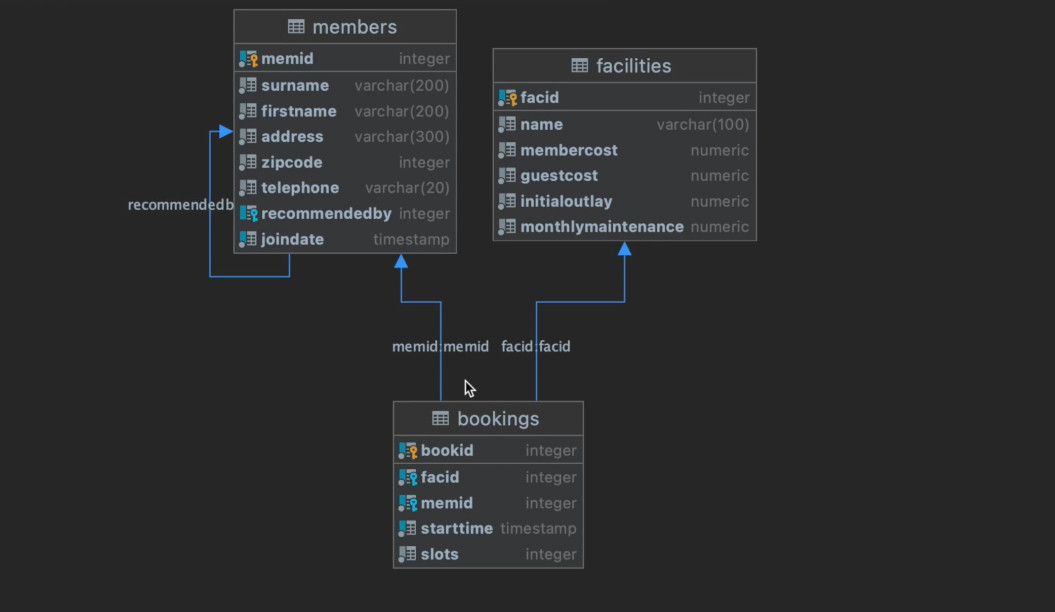

Таблицы связаны между собой ключами, благодаря которым можно перемещаться между ними, подтягивая нужные данные.

* `Первичный ключ (PRIMARY KEY)`–  идентифицирует каждую запись в таблице. Как правило, это уникальный идентификатор записи. Первичный ключ столбец не может иметь значения NULL. Таблица может иметь только один первичный ключ, который может состоять из одного или нескольких полей. Когда несколько полей используются в качестве первичного ключа, их называют составным ключом.
* `Внешний ключ (FOREIGN KEY)` – устанавливает родительско-дочерние отношения в таблице. Обычно таблица с внешним ключом – дочерняя, а таблица без внешнего – родительская.

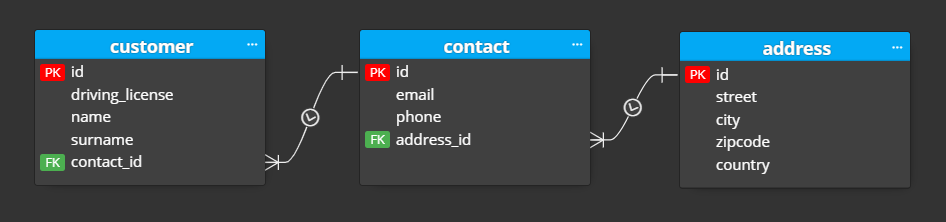

`Транзакции` – операции обработки данных, которые переводят базу из одного состояния в другое. 

Транзакции подчиняются аббревиатуре ACID – атомарность, согласованность, изолированность и стойкость. 

`Атомарность` – гарантирует, что никакая транзакция не будет зафиксирована в системе частично

`Согласованность` – каждая успешная транзакция по определению фиксирует только допустимые результаты.

`Изолированность` – при параллельном выполнении транзакции никак не влияют друг на друга.

`Стойкость` – если транзакция выполнена, то результат будет точно сохранен вне зависимости от проблем с оборудованием.

In [ ]:
SELECT f.name, b.starttime, m.firstname, m.surname
FROM bookings b
JOIN facilities f on f.facid = b.facid
JOIN members m on b.memid = m.memid
WHERE firstname = 'David' AND DATE(b.starttime) > '2010-01-01';

# JOIN - объединяем таблицы
Во всех примерах выше мы видели `id` у сущностей: у пользователя был `id`, у поста был `id`.
Зачем они нужны?

Для ответа на вопрос понадобится немного теории.

## Отношения
PostgreSQL - _реляционная_ СУБД. Реляционный (англ. _relationalal_, "относительный") означает, что есть отношения между сущностями, хранящимися в базе данных. Например, могут быть отношения между пользователем и постом.

Отношение - это некая взаимосвязь между сущностями. Обычно отношения задаются бизнес-требованиями и сутью лежащих в БД данных. Отношения порождают связи. `id` как раз выступают звеном в таких связях.

## JOIN
 пример:


In [ ]:

SELECT f.name, b.starttime
FROM bookings b                               # через пробел дали короткое имя b
JOIN facilities f on f.facid = b.facid;

В таблице `bookings` лежат id площадок и время бронирования.
Чтобы забрать сам факультет, необходимо найти его по соответствию (`facid` в `bookings` <--> `facid` в `facilities`). Для этого мы воспользовались `JOIN`.

`JOIN` пишется по следующим правилам:
1. Он должен идти после `FROM`.
2. Он должен выглядеть следующим образом: `JOIN иная_таблица ON условие_соединения`. 

Разбитие на две таблицы позволит не хранить в каждой записи таблицы `bookings` инофрмацию о площадке.
Представьте себе ситуацию: одну и ту же площадку бронируют 1 млн раз. Если бы мы хранили всю информацию о площадке (название, стоимость и т.п.) в таблице бронирований, то получили бы 1 млн одинаковых значений в колонках. Много хранить, легко ошибиться. Использование `facid` и связки данных решило проблему: вместо дублирования длинной информации мы храним и дублируем короткое число - `facid`.

## Несколько JOIN
Можно соединять несколько таблиц в одном запросе:

In [ ]:
SELECT f.name, b.starttime, m.firstname, m.surname
FROM bookings b
JOIN facilities f on f.facid = b.facid
JOIN members m on b.memid = m.memid
WHERE firstname = 'David' AND DATE(b.starttime) > '2010-01-01';

Этот запрос отдаст нам имя площадки, время брони, имя и фамилию забронировшего для всех записей, где бронировавшего зовут 'David' и дата брони больше 2010-01-01.

_Обратите внимание_: мы воспользовались функцией в postgres. Это была функция `DATE(p.text)`, которая приняла на вход колонку `starttime` из таблицы `bookings` и вернула колонку с датой (отбросив время). Функции в postgres работают схожим с Python образом: тоже имеют аргументы и возвращаемое значение.

## > Виды JOIN

Когда мы склеиваем две таблички, не всегда может по `memid` в `bookings` найтись соответствующая запись в `members`. И наоборот: не для каждого `memid` из `members` может найтись запись в `bookings` с соответствующим `memid` (к примеру, если пользователь ничего не бронировал).

SQL умеет обрабатывать эти случаи, и поддерживает несколько режимов.

**Важное замечание**: если не писать, какой `JOIN`, то по умолчанию берется LEFT JOIN.

### LEFT JOIN
`LEFT JOIN` берет **все** данные из `FROM`, затем берутся **соответствующе** данные (не все!) в таблице после `JOIN`. Там, где нет результатов в таблице после `JOIN`, выставляет `NULL` (символ пропуска значения).
```sql
SELECT f.name, b.starttime
FROM bookings b
LEFT JOIN facilities f on f.facid = b.facid;
-- Берутся все bookings. Если для какого-нибудь bookings по facid не найдется площадка в facilities,
-- то f.name будет заполнен NULL
```

`LEFT JOIN` используется, когда важно сохранить все данные из оригинальной таблицы.
**Важное замечание**: если не писать, какой `JOIN`, то по умолчанию берется LEFT JOIN.
### RIGHT JOIN
Аналогичен LEFT JOIN, только теперь наоборот: сначала берутся **все** данные из таблицы в `RIGHT JOIN`, затем берутся **соответствующие** данные из таблицы в `FROM` (не все). Там, где нет соответствующих значений в таблице `FROM`, ставятся `NULL`:
```sql
SELECT f.name, b.starttime
FROM bookings b
RIGHT JOIN facilities f on f.facid = b.facid;
-- Берутся все площадки. Если для какого-нибудь facid из facilities не найдется facid в bookings,
-- то b.starttime будет заполнен NULL.
-- В любом случае будут возвращены все записи из facilites!
```
`RIGHT JOIN` используется, когда важно получить данные из таблицы после `RIGHT JOIN`.
`RIGHT JOIN` почти всегда можно свести к `LEFT JOIN`, поэтому выбирается обычно тот, что дает более читаемый код.

### INNER JOIN
Комбинация LEFT JOIN и RIGHT JOIN, `INNER JOIN` выдаст в результате только пересечения обоих таблиц. Очень удобно, чтобы найти "хорошие" данные - те, где и там и тут сохранились записи.

```sql
SELECT f.name, b.starttime
FROM bookings b
INNER JOIN facilities f on f.facid = b.facid;
-- Возьмутся только те bookings, на которых найдется площадка в таблице facilities
-- и только те площадки, на которые найдется хотя бы одна запись в bookings.
-- Самый "узкий" из всех JOIN
```
### FULL OUTER JOIN
Самый широкий JOIN. Берет все записи из обоих таблиц. Если нашлось соотвествие, то заполняет колонки, иначе помещает туда `NULL`.
```sql
SELECT f.name, b.starttime
FROM bookings b
FULL OUTER JOIN facilities f on f.facid = b.facid;
-- Возьмутся все записи из bookings и все записи из facilities.
-- Там, где возможно установить соответствие, оно будет установлено.
-- Где соответствие провести нельзя, будет помещен NULL,
-- причем NULL может уйти как в таблицу слева, так и справа!
-- Самый "широкий" из всех JOIN
```

Наглядно различия между JOIN можно видеть на картинке ниже:

![Виды JOIN](https://www.codeproject.com/KB/database/Visual_SQL_Joins/Visual_SQL_JOINS_orig.jpg)

# SQL в Python
## psycopg2
Для работы с SQL нам понадобится библиотека [psycopg2](https://pypi.org/project/psycopg2/). Она дает возможность подключаться к PostgreSQL и запускать SQL-запросы.

In [ ]:
!pip install psycopg2-binary 

In [15]:
import psycopg2
# connection - это объект, который отвечает за соединение с БД
connection = psycopg2.connect(
    # database - это база данных (именно база, не СУБД)
    # PostgreSQL создает несколько баз данных
    # Каждая база данных содержит схемы (schema)
    # и каждая схема состоит из таблиц (тех, с кем мы уже работали)
    database='postgres',
    host='localhost',  # это говорит, что СУБД работает на моем компьютере
    user='postgres',  # имя пользователя
    password=''  # пароль
    # port=5432,  # порт не указываем, по умолчанию 5432
)
# cursor - это объект, который отвечает за воздействие с базой данных
cursor = connection.cursor()
# Делаем запрос
cursor.execute("""
SELECT * FROM lernsql1.address
""")
# Получаем результаты
results = cursor.fetchall()
results  # Это будет стандартный Python-объект. Не очень удобно, но работает

[(1,
  '47 MySakila Drive',
  300,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (2,
  '28 MySQL Boulevard',
  576,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (3,
  '23 Workhaven Lane',
  300,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (4,
  '1411 Lillydale Drive',
  576,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (5,
  '1913 Hanoi Way',
  463,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (6,
  '1121 Loja Avenue',
  449,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (7,
  '692 Joliet Street',
  38,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (8,
  '1566 Inegl Manor',
  349,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (9,
  '53 Idfu Parkway',
  361,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  False),
 (10,
  '1795 Santiago de Composte',
  295,
  datetime.datetime(2021, 10, 14, 18, 19, 57, 588936),
  Fal

In [23]:
import pandas as pd

# второй аргумент будет специальная строка. Для PostgreSQL имеет вид:
# postgresql://имя:пароль@хост:порт/база_данных

conn_uri = "postgresql://postgres:@localhost:5432/postgres"

df = pd.read_sql(
    # первый аргумент - SQL запрос
    """
    SELECT * 
    FROM lernsql1.address a 
    join lernsql1.customer c on a.address_id = c.address_id
    WHERE c.deleted = 'False'
    """, 
    conn_uri  # наша строка с подключением
)
df_aggregate = df.copy()
df.head()


,address_id,address,city_id,created_date,deleted,customer_id,last_name,first_name,email,password,address_id,born_date,created_date,deleted
0,7,692 Joliet Street,38,2021-10-14 18:19:57.588936,False,1,Williams,Linda,linda.williams@sakilacustomer.org,321152459,7,1954-10-12,2021-10-14 18:23:09.828876,False
1,10,1795 Santiago de Composte,295,2021-10-14 18:19:57.588936,False,2,Davis,Jennifer,jennifer.davis@sakilacustomer.org,523065559,10,1976-01-07,2021-10-14 18:23:09.828876,False
2,12,478 Joliet Way,200,2021-10-14 18:19:57.588936,False,3,Wilson,Susan,susan.wilson@sakilacustomer.org,520707267,12,1967-05-27,2021-10-14 18:23:09.828876,False
3,14,1531 Sal Drive,162,2021-10-14 18:19:57.588936,False,4,Taylor,Dorothy,dorothy.taylor@sakilacustomer.org,383883532,14,1955-01-24,2021-10-14 18:23:09.828876,False
4,15,1542 Tarlac Parkway,440,2021-10-14 18:19:57.588936,False,5,Anderson,Lisa,lisa.anderson@sakilacustomer.org,739726872,15,1964-12-08,2021-10-14 18:23:09.828876,False


### Запись
`pandas` умеет не только читать таблицу, но и записывать данные обратно! Для этого используется функция `to_sql`:

In [26]:
# и сохраним эти данные в БД
df_aggregate.to_sql(
    # имя таблицы, куда писать данные
    "agg_customer",
    # строка для подключения к БД
    conn_uri,
    # Схема, в которой создать таблицу
    schema="lernsql1",
    # что делать, если уже существует. Одно из трех значений
    # 'fail' - выдать ошибку
    # 'replace' - снести и создать с новыми данными
    # 'append' - дополнить датафреймом, не трогая существующие данные
    if_exists='replace'
)

389

In [27]:
# читаем успешно записанную табличку
import pandas as pd

# второй аргумент будет специальная строка. Для PostgreSQL имеет вид:
# postgresql://имя:пароль@хост:порт/база_данных

conn_uri = "postgresql://postgres:@localhost:5432/postgres"

df = pd.read_sql(
    # первый аргумент - SQL запрос
    """
    SELECT * 
    FROM lernsql1.agg_customer
    """, 
    conn_uri  # наша строка с подключением
)
df.head()

,index,address_id,address,city_id,created_date,deleted,customer_id,last_name,first_name,email,password,born_date
0,0,7,692 Joliet Street,38,2021-10-14 18:23:09.828876,False,1,Williams,Linda,linda.williams@sakilacustomer.org,321152459,1954-10-12
1,1,10,1795 Santiago de Composte,295,2021-10-14 18:23:09.828876,False,2,Davis,Jennifer,jennifer.davis@sakilacustomer.org,523065559,1976-01-07
2,2,12,478 Joliet Way,200,2021-10-14 18:23:09.828876,False,3,Wilson,Susan,susan.wilson@sakilacustomer.org,520707267,1967-05-27
3,3,14,1531 Sal Drive,162,2021-10-14 18:23:09.828876,False,4,Taylor,Dorothy,dorothy.taylor@sakilacustomer.org,383883532,1955-01-24
4,4,15,1542 Tarlac Parkway,440,2021-10-14 18:23:09.828876,False,5,Anderson,Lisa,lisa.anderson@sakilacustomer.org,739726872,1964-12-08


In [41]:
df.groupby('city_id')['address_id'].count().value_counts()

312    2
42     2
38     1
358    1
44     1
      ..
506    1
195    1
467    1
126    1
296    1
Name: city_id, Length: 387, dtype: int64